> # **Background Business**
Transjakarta is the first Bus Rapid Transit (BRT) transport system in Southeast and South Asia operating since 2004 in Jakarta, Indonesia. TransJakarta was designed as a mass transport mode to support the capital's hectic activities. With the longest track in the world (251.2 km), as well as having 287 bus stops spread across 13 corridors, Transjakarta which initially operates from Pkl. 05.00 - Pkl. 22.00 WIB, now operates 24 hours. Transjakarta traportation divide by 3 type of transportation mode which are, Transjakarta, Mikrotrans, and Royaltrans

<url>https://transjakarta.co.id/produk-dan-layanan/layanan-bus/transjakarta/<url>

> # **Business Problem**
A major challenge for public transportation providers like Transjakarta is dealing with changes in fuel costs. When crude oil prices go up, the price of gasoline also increases. This directly affects how much it costs to run the system (operational expenses). These rising costs can threaten the sustainability and efficiency of public transportation systems.

> # **Data Analysis Goal**
The objective is to analyze strategies for optimizing Transjakarta's transportation costs. By identifying and focus on underperform each type of transportation

# **1. Import Library**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

# **2. Data Understanding**

Here are the details of the data:

<br> **Transaction** <br>
- **Transaction ID (transID)**: A unique identifier for every transaction.

<br> **Customer Information** <br>
- **Customer ID (payCardID)**: The main identifier for the customer. This is likely the card number that the customer uses as a ticket to enter and exit the public transportation system.
- **Customer Bank (payCardBank)**: The name of the bank that issued the customer's card.
- **Customer Name (payCardName)**: The customer's name that is embedded on the card.
- **Customer Sex (payCardSex)**: The customer's sex that is embedded on the card.
- **Customer Birth Year (payCardBirthDate)**: The year the customer was born.

<br> **Trip Information** <br>
- **Corridor ID (corridoriD)**: An identifier for the route that the customer took.
- **Corridor Name (corridorName)**: The name of the route that the customer took, including the start and end stops.
- **Direction (direction)**: Indicates whether the customer was traveling going (0) or back (1).
- **Tap In Stop ID (tapinStops)**: The identifier for the stop where the customer entered the public transportation system.
- **Tap In Stop Name (tapinStopsName)**: The name of the stop where the customer entered the public transportation system.
- **Tap In Stop Latitude (tapinStopsLat)**: The latitude coordinate of the stop where the customer entered the public transportation system.
- **Tap In Stop Longitude (tapinStopsLon)**: The longitude coordinate of the stop where the customer entered the public transportation system.
- **Tap In Stop Sequence (stopStartSeq)**: The sequence of the stop where the customer entered the public transportation system relative to the direction they were traveling. For example, the first stop would be sequenced as 1.
- **Tap In Time (tapinTime)**: The date and time that the customer entered the public transportation system.
- **Tap Out Stop ID (tapOutStops)**: The identifier for the stop where the customer exited the public transportation system.
- **Tap Out Stop Name (tapOutStopsName)**: The name of the stop where the customer exited the public transportation system.
- **Tap Out Stop Latitude (tapOutStopsLat)**: The latitude coordinate of the stop where the customer exited the public transportation system.
- **Tap Out Stop Longitude (tapOutStopsLon)**: The longitude coordinate of the stop where the customer exited the public transportation system.
- **Tap Out Stop Sequence (stopEndSeq)**: The sequence of the stop where the customer exited the public transportation system relative to the direction they were traveling. For example, the first stop would be sequenced as 1.
- **Tap Out Time (tapOutTime)**: The date and time that the customer exited the public transportation system.

<br> **Fare Information** <br>
- **Payment Amount (payAmount)**: The amount of fare the customer paid for the trip.

In [3]:
# See all of the dataframe them at once. *since pandas truncates the display of DataFrames to a limited number of columns
pd.set_option('display.max_columns', None)

In [4]:
# Import the file and display
df = pd.read_csv('/Users/naufaldaffa/Documents/Purwadhika /Public Transportation Transaction - Transjakarta/Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [5]:
# See summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## **2.1 Descriptive Statistic**

In [6]:
# Check summary statistics for numerical columns in the DataFrame.
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [7]:
# Check summary statistics for categorical columns in the DataFrame.
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


## **2.2 Unique Value each Feature**

In [995]:
# Count the number of distinct (unique) values in each column of the DataFrame.
df.nunique()

transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64

## **2.3. Missing Value Check**

In [997]:
# Check total count of missing values in each column of the DataFrame.
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

<Axes: >

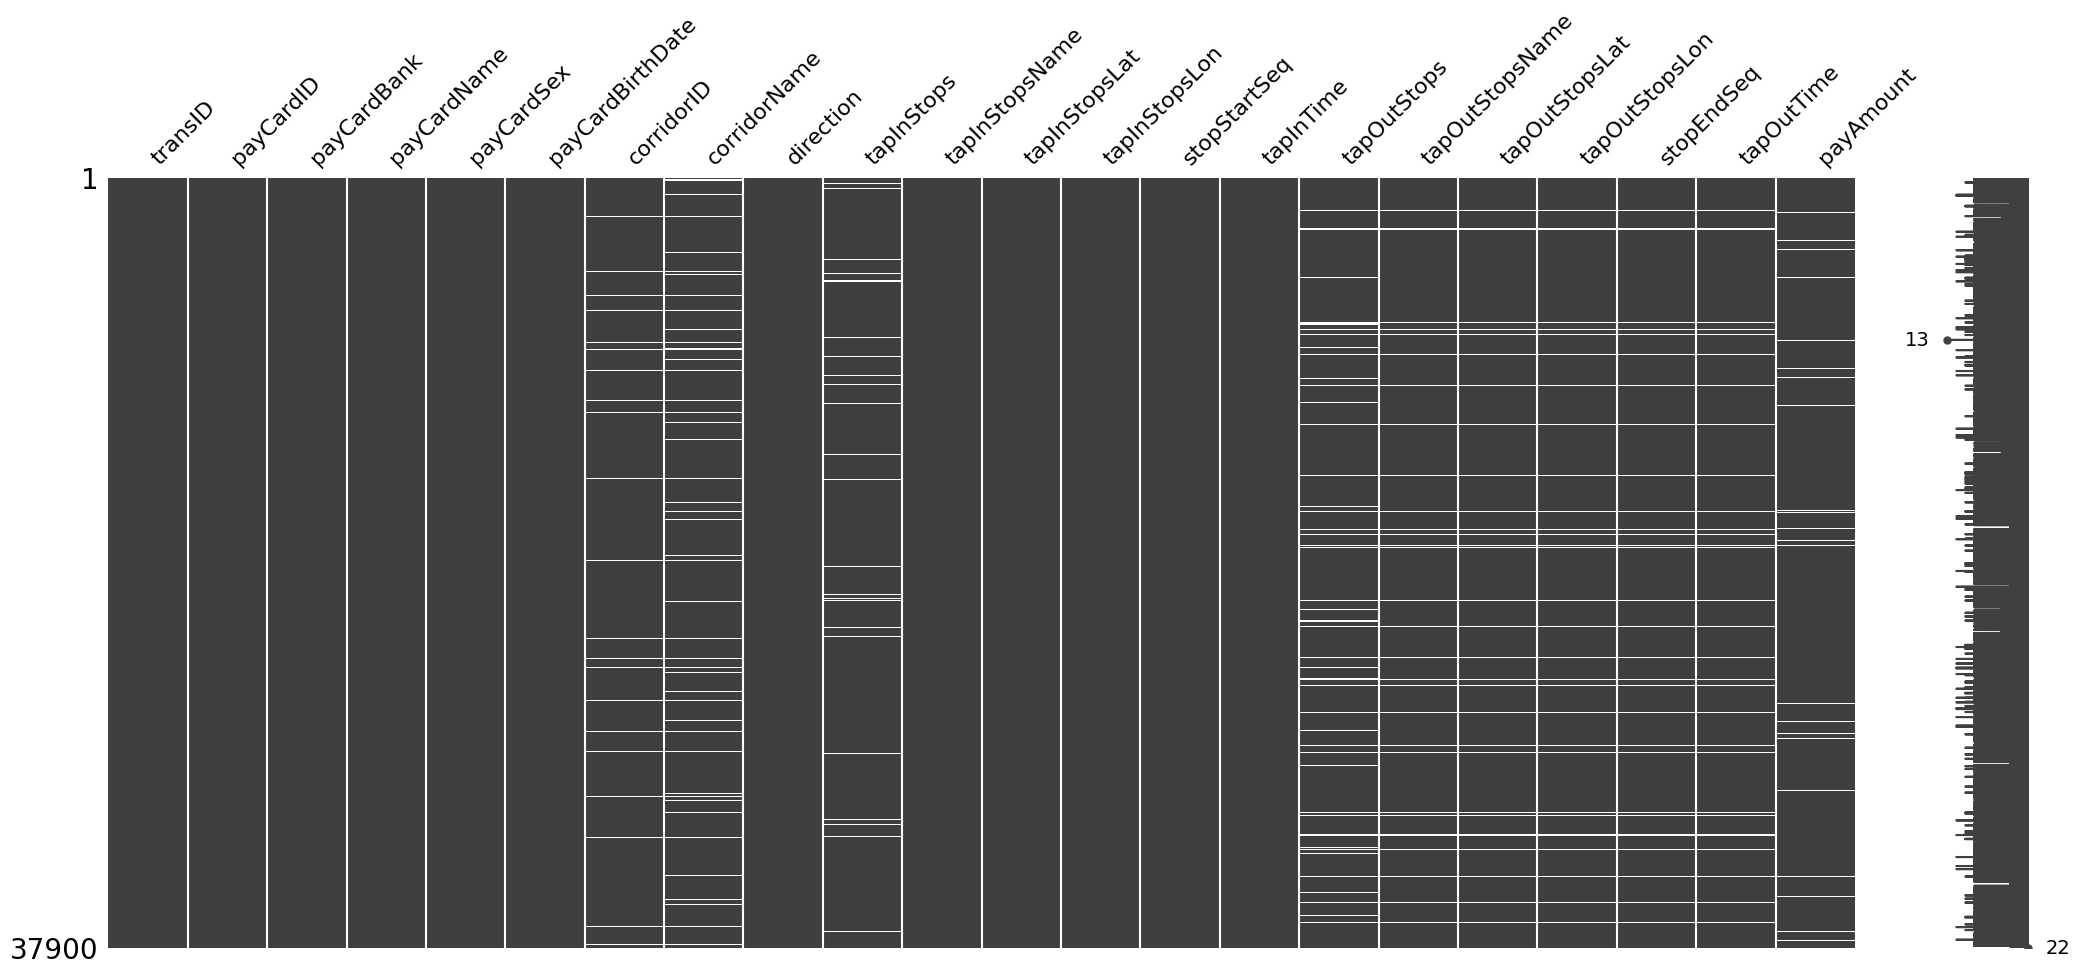

In [998]:
# identify which columns have missing values and how the missingness is distributed across the DataFrame.
msn.matrix(df)

**Highlight**:
Based on the graph above, there're several missing value in this dataset such as in column 
* corridorID, 
* corridorName, 
* tapInStops, 
* tapOutStops, 
* tapOutStopsName, 
* tapOutStopsLon, 
* stopEndSeq, 
* tapOutTime

We will explore techniques to handle missing data, considering the potential relationships between features (e.g., filling corridorID with corresponding corridorName if available).

### **2.3.1 Missing value corridorID but have corridorName**
Detecting corridorID which have corridorName is useful. This assumes a one-to-one correspondence between corridor IDs and names that might be helpful to fill the missing row

In [1055]:
# Check missing value in corridorID
print('Missing corridorID: ', df['corridorID'].isna().sum())

# Check missing value in corridorID but have corridorName
df_missing_corridorID = df.loc[(df['corridorID'].isna() == True) & (df['corridorName'].isna() == False), ['corridorID', 'corridorName']]
print('Missing corridorID but have corridorName: ', df_missing_corridorID['corridorName'].count())
df_missing_corridorID.head()

Missing corridorID:  0
Missing corridorID but have corridorName:  0


,corridorID,corridorName


### **2.3.2 Missing value corridorID but have corridorName**
Detecting corridorName which have corridorName is useful. This assumes a one-to-one correspondence between corridor IDs and names that might be helpful to fill the missing row

In [1000]:
# Check missing value in corridorName
print('Missing corridorName: ', df['corridorName'].isna().sum())

# Check missing value in corridorName but have corridorID
df_missing_corridorName = df.loc[(df['corridorName'].isna() == True) & (df['corridorID'].isna() == False), ['corridorName', 'corridorID']]
print('Missing corridorName but have corridorID: ', df_missing_corridorName['corridorID'].count())
df_missing_corridorName.head()

Missing corridorName:  1930
Missing corridorName but have corridorID:  805


,corridorName,corridorID
38,NaN,5M
39,NaN,2
60,NaN,T21
61,NaN,12A
73,NaN,M3


### **2.3.3 Missing value tapInStops but have tapInStopsName**
Detecting tapInStops which have tapInStopsName is useful. This assumes a one-to-one correspondence between tapInStops and tapInStopsName that might be helpful to fill the missing row

In [1001]:
# Check missing value in tapInStops
print('Missing tapInStops: ', df['tapInStops'].isna().sum())

# Check missing value in tapInStops but have tapInStopsName
df_missing_tapInStops = df.loc[(df['tapInStops'].isna() == True) & (df['tapInStopsName'].isna() == False), ['tapInStops', 'tapInStopsName']]
print('Missing tapInStops but have tapInStopsName: ', df_missing_tapInStops['tapInStopsName'].count())
df_missing_tapInStops.head()

Missing tapInStops:  1213
Missing tapInStops but have tapInStopsName:  1213


,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi


### **2.3.4 Missing value tapOutStops but have tapOutStopsName**
Detecting tapOutStops which have tapOutStopsName is useful. This assumes a one-to-one correspondence between tapOutStops and tapOutStopsName that might be helpful to fill the missing row

In [1002]:
# Check missing value in tapOutStops
print('Missing tapOutStops: ', df['tapOutStops'].isna().sum())

# Check missing value in tapOutStops but have tapOutStopsName
df_missing_tapOutStops = df.loc[(df['tapOutStops'].isna() == True) & (df['tapOutStopsName'].isna() == False), ['tapOutStops', 'tapOutStopsName']]
print('Missing tapOutStops but have tapInStopsName: ', df_missing_tapOutStops['tapOutStopsName'].count())
df_missing_tapOutStops.head()

Missing tapOutStops:  2289
Missing tapOutStops but have tapInStopsName:  945


,tapOutStops,tapOutStopsName
89,NaN,Walikota Jakarta Timur
149,NaN,Budi Utomo
168,NaN,Pertamina Kalideres Daan Mogot
359,NaN,Sbr. Kebantenan IX
428,NaN,HKBP Rawamangun


### **2.3.5 Missing value in payAmount but have corridorID**
Detecting payAmount which have corridorID is useful. This assumes a one-to-one correspondence between payAmount and corridorID that might be helpful to fill the missing row

In [1003]:
# Check missing value in payAmount
print('Missing payAmount: ', df['payAmount'].isna().sum())

# Check missing value in payAmount but have corridorID
df_missing_payAmount = df.loc[(df['payAmount'].isna() == True) & (df['corridorID'].isna() == False),['corridorID', 'payAmount']]
print('Missing payAmount but have corridorID: ', df_missing_payAmount['corridorID'].count())
display(df_missing_payAmount.head())

Missing payAmount:  1007
Missing payAmount but have corridorID:  976


,corridorID,payAmount
11,M7B,NaN
76,JAK.48B,NaN
97,3H,NaN
169,M7B,NaN
198,JAK.48A,NaN


## **2.4. Duplicated Check**

In [1004]:
# Find all duplicate rows in dataframe
df[df.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [1005]:
# Check duplicate in transID column
df[df['transID'].duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


As we can see, there's no duplicated row in this dataset

## **2.5. Detect Outliers**

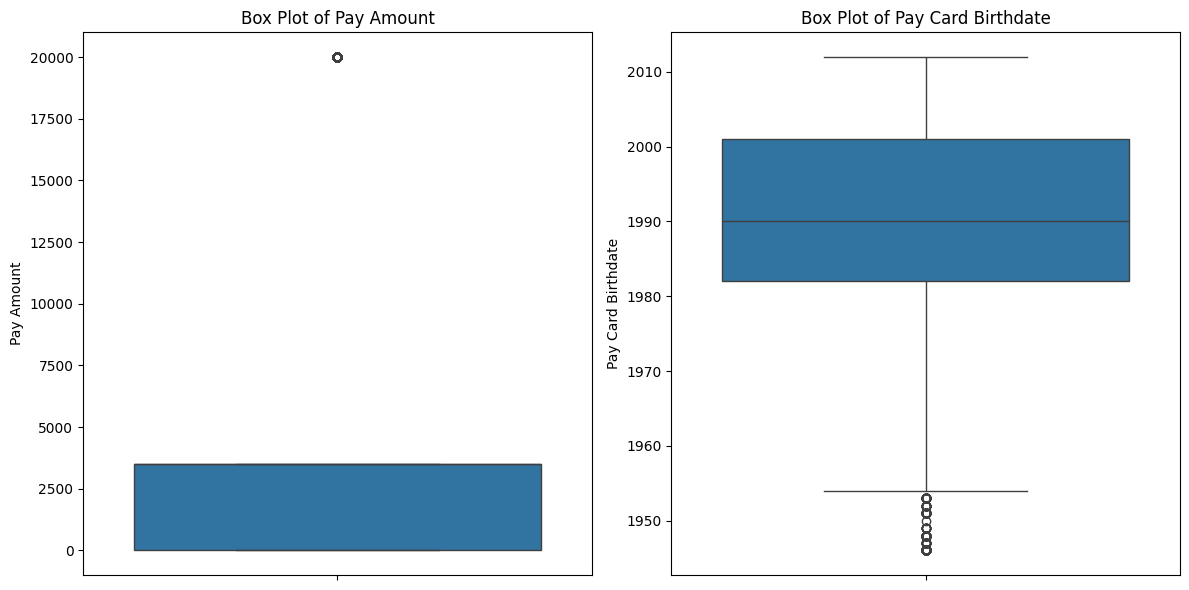

In [1006]:
# Create subplots with 1 row and 2 columns (2 figures)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

# Create boxplot for payAmount
sns.boxplot(ax=axes[0], y=df['payAmount'])  
axes[0].set_title('Box Plot of Pay Amount')
axes[0].set_ylabel('Pay Amount')

# Create boxplot for payCardBirthDate
sns.boxplot(ax=axes[1], y=df['payCardBirthDate'])  
axes[1].set_title('Box Plot of Pay Card Birthdate')
axes[1].set_ylabel('Pay Card Birthdate')

# Rotate x labels to prevent overlapping (optional)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)  #

plt.tight_layout()

plt.show()

* **PayAmount**: An amount of Rp. 20,000 might be a valid fare for a longer trip and should likely not be removed.
* **Birthdate**: While there might be some outliers, birthdate information can be valuable for understanding ridership demographics and should likely be retained.

# **3. Data Cleansing**

## **3.1 Handling Missing Values**

### **3.1.1 Filling Corridor ID columns**

* This code fills the missing values in the corridorID column by leveraging the most frequent value (mode) for each group identified by the corridorName. 
* It first finds the mode for each corridor name and then creates a dictionary to map corridor names to their corresponding modes. 
* Finally, it iterates through each row in the DataFrame and fills the missing corridorID values based on the corridorName using the created dictionary.

In [12]:
# Group by corridor ID by corridorName to get mode corridorID in corridorName
corr_ID = df.groupby('corridorName')['corridorID'].apply(lambda k: k.mode()[0]).reset_index()
corr_ID


,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


In [1008]:
# Create dictionary named corrID_mapping. The disctionary key becomes the corridorName, and 
# the value becomes the corresponding mode (most frequent) corridorID for that corridor name.
corrID_mapping = dict(zip(corr_ID['corridorName'], corr_ID['corridorID']))
corrID_mapping

{'Andara - Stasiun Universitas Pancasila': 'JAK.44',
 'BKN - Blok M': 'M7B',
 'BSD - Jelambar': 'S11',
 'BSD Serpong - Fatmawati': 'S12',
 'Batusari - Grogol': '8K',
 'Bekasi Barat - Blok M': 'B13',
 'Bekasi Barat - Kuningan': 'B14',
 'Bekasi Timur - Cawang': 'B21',
 'Bintara - Cipinang Indah': 'JAK.85',
 'Bintaro - Blok M': '8E',
 'Bintaro - Fatmawati': 'S31',
 'Blok M - Andara': 'JAK.31',
 'Blok M - Kota': '1',
 'Blok M - PGC': '7Q',
 'Blok M - Pasar Minggu': '6U',
 'Blok M - Universitas Indonesia': '9H',
 'Bulak Ringin - Kampung Rambutan': 'JAK.38',
 'Bulak Turi - Tanjung Priok': 'JAK.15',
 'Cawang UKI - Lubang Buaya': 'JAK.20',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading': 'JAK.61',
 'Cibubur - BKN': '7C',
 'Cibubur - Balai Kota': '1T',
 'Cibubur - Kuningan': '6P',
 'Cibubur Junction - Blok M': '1K',
 'Cilangkap - Cililitan': 'JAK.36',
 'Ciledug - Tendean': '13',
 'Cililitan - Condet': 'JAK.16',
 'Cililitan - Condet via Kayu Manis': 'JAK.37',
 'Cililitan - Dwikora': 'JAK.21',
 

In [1009]:
# Filling missing value with mode if corridorID is null and corridorName is not null
df['corridorID'] = df.apply(
    lambda row: corrID_mapping[row['corridorName']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName'])  
    else row['corridorID'],
    axis=1
)

In [1010]:
# Check the rest amount of null value in corridorID
df['corridorID'].isna().sum()

1125

The rest amount of null value is corridorID after we fill missing value is 1125

### **3.1.2 Fill Corridor Name Columns**

* This code fills the missing values in the corridorName column by leveraging the most frequent value (mode) for each group identified by the corridorID. 
* It first finds the mode for each corridor id and then creates a dictionary to map corridor id to their corresponding modes. 
* Finally, it iterates through each row in the DataFrame and fills the missing corridorName values based on the corridorID using the created dictionary.

In [1011]:
# Group by corridorName by corridorID to get mode corridorName in corridorID
corrName = df.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0]).reset_index()
corrName

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


In [1012]:
# Create dictionary named corrName_mapping. The disctionary key becomes the corridorID, and 
# the value becomes the corresponding mode (most frequent) corridorName for that corridorID.
corrName_mapping = dict(zip(corrName['corridorID'], corrName['corridorName']))
corrName_mapping

{'1': 'Blok M - Kota',
 '10': 'Tanjung Priok - PGC 2',
 '10A': 'Rusun Marunda - Tanjung Priok',
 '10B': 'Rusun Cipinang Besar Selatan - Penas Kalimalang',
 '10D': 'Kampung Rambutan - Tanjung Priok',
 '10H': 'Tanjung Priok - Blok M',
 '10K': 'Tanjung Priok - Senen via Taman BMW',
 '11': 'Pulo Gebang - Matraman',
 '11B': 'Rusun Rawa Bebek - Penggilingan',
 '11C': 'Rusun Pinus Elok - Rusun Pulo Gebang',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '11K': 'Rusun Komarudin - Penggilingan',
 '11M': 'Rusun Rawa Bebek - Bukit Duri',
 '11N': 'Rusun Cipinang Muara - Jatinegara',
 '11P': 'Rusun Pondok Bambu - Walikota Jakarta Timur',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 '12': 'Tanjung Priok - Pluit',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '12B': 'Pluit - Senen',
 '12C': 'Rusun Waduk Pluit - Penjaringan',
 '12F': 'Rusun Marunda - Rusun Waduk Pluit',
 '12H': 'Rusun Penjaringan - Penjaringan',
 '12P': 'St. LRT Pegangsaan Dua - JIS',
 '13': 'Ciledug - Tendean',
 '13B': 'Puri Beta - Panc

In [1013]:
# Filling missing value with mode if corridorID is null and corridorName is not null
df['corridorName'] = df.apply(
    lambda row: corrName_mapping[row['corridorID']] 
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])  
    else row['corridorName'],
    axis=1
)

In [1014]:
# Check the rest amount of null value in corridorName
df['corridorName'].isna().sum()

1125

Remaining of null value in corridorName after we fill missing value is 1125

### **3.1.3 Fill tap in stop**

In [1015]:
# Group by tapInStops by tapInStopsName to get mode (most frequent) tapInStops in tapInStopsName
TIS_ID = df.groupby('tapInStopsName')['tapInStops'].apply(lambda i: i.mode().iloc[0] if not i.mode().empty else None).reset_index()
TIS_ID

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


In [1016]:
# Create dictionary named TIS_mapping. The disctionary key becomes the tapInStopsName, and 
# the value becomes the corresponding mode (most frequent) tapInStops for that tapInStopsName.
TIS_mapping = dict(zip(TIS_ID['tapInStopsName'], TIS_ID['tapInStops']))
TIS_mapping

{'18 Office Park': 'B00001P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'AKR Tower': 'B00018P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'Adam Malik': 'P00001',
 'Adam Malik 1': 'B00008P',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Akper Fatmawati Pondok Labu': 'B00017P',
 'Al Izhar Pondok Labu 2': 'B00027P',
 'Al Khairiyah School': 'B00028P',
 'Al Mukhlisin': 'B00030P',
 'Al Wathoniyah 1': 'B00031P',
 'Al Wathoniyah 2': 'B00032P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 3': 'B00037P',
 'Ampera Garden': 'B00039P',
 'Ampera Yos Sudarso': 'B00040P',
 'Ananda Pulo Gadung': 'B00041P',
 'Ancol': 'P00003',
 'Ancol Pintu 2': 'B06000P',
 'Andara Margasatwa 2': 'B00043P',
 'Andara Margasatwa 3': 'B00044P',
 'Andara Margasatwa 4': 'B00045P',
 'Aneka Apotek': 'B00046P',
 'Aneka PIK Penggilingan': 'B00048P',
 'Antena III': 'B00052P',
 'Apartemen Kedoya Elok 2': 'B00056P',
 'Apartemen Simprug Te

In [1017]:
# Filling missing value with mode if tapInStops is null and tapInStopsName is not null
df['tapInStops'] = df.apply(
    lambda row: TIS_mapping[row['tapInStopsName']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName'])  
    else row['tapInStops'],
    axis=1
)

In [1018]:
# Check the rest amount of null value in tapInStops
df['tapInStops'].isna().sum()

34

The rest amount of null value is tapInStops after we fill missing value is 34

### **3.1.4 Fill Tap Out Stop**

In [1019]:
# Group by tapOutStops by tapOutStopsName to get mode (most frequent) tapOutStops in tapOutStopsName
TOS_ID = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda o: o.mode().iloc[0] if not o.mode().empty else None).reset_index()
TOS_ID

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


In [1020]:
# Create dictionary named TOS_mapping. The disctionary key becomes the tapOutStopsName, and 
# the value becomes the corresponding mode (most frequent) tapOutStops for that tapOutStopsName.
TOS_mapping = dict(zip(TOS_ID['tapOutStopsName'], TOS_ID['tapOutStops']))
TOS_mapping

{'ABA': 'B00002P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'ASMI 2': 'B00070P',
 'ASSA': 'B06010P',
 'AURI Jatibaru': 'B00086P',
 'Acacia Residence': 'B00003P',
 'Adam Malik': 'P00001',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Ahmad Yani Bea Cukai 1': 'B06534P',
 'Ahmad Yani Pisangan Baru': 'B00013P',
 'Akademi Farmasi Mahadhika': 'B00015P',
 'Akses Jembatan Ciliwung Balekambang': 'B00022P',
 'Al Khairiyah School': 'B00028P',
 'Al Mahbubiyah': 'B00029P',
 'Al Mukhlisin': 'B00030P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 4': 'B00038P',
 'Ancol': 'P00003',
 'Andara Margasatwa 1': 'B00042P',
 'Antena II': 'B00053P',
 'Apartemen Simprug Teras': 'B00058P',
 'Apotik Rini Rawamangun': 'B00060P',
 'Arsip Nasional RI 1': 'B00066P',
 'Arsip Nasional RI 2': 'B00067P',
 'Asrama Marinir Marunda 2': 'B00074P',
 'Asshomadiyah Medicare Centre 2': 'B00077

In [1021]:
# Filling missing value with mode if tapOutStops is null and tapOutStopsName is not null
df['tapOutStops'] = df.apply(
    lambda row: TOS_mapping[row['tapOutStopsName']] 
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])  
    else row['tapOutStops'],
    axis=1
)

In [1022]:
# Check the rest amount of null value in tapOutStops
df['tapOutStops'].isna().sum()

1363

The rest amount of null value is tapOutStops after we fill missing value is 1363

### **3.1.5 Fill payAmount**

Based on Transjakarta webiste, pay amount is devided by the type of transport, which are:

- 20,000 for Royaltrans.
- 3,500 for Reguler.
- 0 for Mikrotrans.

Let's fill payAmount column based corridorID on this data. 
- royaltrans are used this corridorID '1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31', 'T21'
- mikrotrans is started with JAK in corridorID

<url>https://transjakarta.co.id/faq-transjakarta/<url> 

In [1023]:
# Assigning Missing Value in payAmount column based on corridorID
royaltrans_corridors = ['1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31', 'T21']
mikrotrans_starts = 'JAK'

def assign_payamount(corridor_id):
  if corridor_id in royaltrans_corridors:
    return 20000.0
  elif str(corridor_id).startswith(mikrotrans_starts):
    return 0.0
  else:
    return 3500.0

df['payAmount'] = df['corridorID'].apply(assign_payamount)


In [1024]:
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


## **3.2 Drop Null Values**

After attempting to replace the NaN values by filling them with the actual or closest values, there are still some NaN values remaining. These remaining NaN values will be dropped or deleted because there is no other way to replace them.

In [1025]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35428 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           35428 non-null  object 
 1   payCardID         35428 non-null  int64  
 2   payCardBank       35428 non-null  object 
 3   payCardName       35428 non-null  object 
 4   payCardSex        35428 non-null  object 
 5   payCardBirthDate  35428 non-null  int64  
 6   corridorID        35428 non-null  object 
 7   corridorName      35428 non-null  object 
 8   direction         35428 non-null  float64
 9   tapInStops        35428 non-null  object 
 10  tapInStopsName    35428 non-null  object 
 11  tapInStopsLat     35428 non-null  float64
 12  tapInStopsLon     35428 non-null  float64
 13  stopStartSeq      35428 non-null  int64  
 14  tapInTime         35428 non-null  object 
 15  tapOutStops       35428 non-null  object 
 16  tapOutStopsName   35428 non-null  object 
 17

## **3.3 Change Data Type**

Some of the data types in this dataset are not ideal for data analysis. Let's change tapInTime and tapOutTime into proper data type

In [1026]:
# Change to datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

## **3.4 Create new columns**

In [1027]:
# Calculate age
df['age'] = 2023 - df['payCardBirthDate'] 

# Extract time components from tapInTime
# df['time'] = df['tapInTime'].dt.time
df['hour'] = df['tapInTime'].dt.hour
df['day'] = df['tapInTime'].dt.day_name()
# Extract the week number from the date
df['week'] = df['tapInTime'].dt.isocalendar().week

# Create tripTimeSpent to calculate how long customer takes for each trip 
df['tripTimeSpent'] = df['tapOutTime'] - df['tapInTime']

# Convert tripTimeSpent to a more user-friendly format (e.g., minutes)
df['tripTimeSpent'] = df['tripTimeSpent'].dt.total_seconds() / 60

# Combine tapInStopName and tapOutStopName to identify route for each customer
# df['route'] = df['tapInStopsName'] + ' - ' + df['tapOutStopsName']

# Create type of transportation based on price refer to transjakarta website
df['type'] = df['payAmount'].map({
    20000: "royaltrans",
    3500:"transjakarta",
    0:"mikrotrans"})

In [1028]:
df.sample(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,hour,day,week,tripTimeSpent,type
35286,WJWG234B4A85UE,4980564692107508708,brizzi,"Drs. Yessi Wulandari, M.Farm",M,2008,1H,Tanah Abang - Stasiun Gondangdia,0.0,B04728P,Simpang Blok A,-6.187214,106.81611,9,2023-04-14 13:34:47,B00158P,Blok E,-6.184970,106.81463,11.0,2023-04-14 14:28:31,3500.0,15,13,Friday,15,53.733333,transjakarta
31213,JUZX253N7X14ZV,6539609181866141,dki,"R.A. Ani Mahendra, S.Gz",F,1996,13C,Puri Beta - Dukuh Atas,0.0,P00200,Rawa Barat,-6.238947,106.81624,11,2023-04-28 08:19:28,P00216,Semanggi,-6.221110,106.81354,14.0,2023-04-28 10:15:42,3500.0,27,8,Friday,17,116.233333,transjakarta
3300,ICIV755Q6E57TI,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,0.0,P00021,Budi Utomo,-6.166063,106.83906,9,2023-04-10 17:56:32,P00140,Pademangan,-6.133704,106.83164,13.0,2023-04-10 19:39:18,3500.0,15,17,Monday,15,102.766667,transjakarta
32070,MVCG936J7X02BC,375351347671954,emoney,"Cecep Rahimah, M.Pd",F,1974,6U,Blok M - Pasar Minggu,0.0,B00719P,Gunawarman 2,-6.234276,106.80756,2,2023-04-08 10:10:20,B04678P,Senopati,-6.230687,106.80809,3.0,2023-04-08 10:55:02,3500.0,49,10,Saturday,14,44.700000,transjakarta
3063,CCRF333O8P70RS,180057903365395,emoney,Daryani Prabowo,M,1989,1,Blok M - Kota,1.0,P00104,Karet Sudirman,-6.212457,106.82003,14,2023-04-10 05:53:35,P00133,Masjid Agung,-6.236483,106.79845,19.0,2023-04-10 06:29:40,3500.0,34,5,Monday,15,36.083333,transjakarta
10690,LHBD023D4W39KQ,30164080918459,bni,Daliono Adriansyah,F,2012,12,Tanjung Priok - Pluit,1.0,P00069,Gedong Panjang,-6.132617,106.80596,3,2023-04-26 16:39:22,P00171,Permai Koja Arah Utara,-6.114130,106.89309,18.0,2023-04-26 18:06:04,3500.0,11,16,Wednesday,17,86.700000,transjakarta
22267,OWDJ566W0H26YR,502057680857,flazz,Daru Budiyanto,M,1984,JAK.06,Kampung Rambutan - Pondok Gede,1.0,B01532P,Jln. Rama IX,-6.299269,106.90856,36,2023-04-17 06:20:28,B01594P,Jln. SPG 7,-6.286157,106.90490,47.0,2023-04-17 07:23:23,0.0,39,6,Monday,16,62.916667,mikrotrans
30155,TNQK873L8S27DZ,3548452441599863,dki,Gawati Wijaya,F,2003,9E,Kebayoran Lama - Jelambar,0.0,B02139P,Limo,-6.225483,106.78881,4,2023-04-27 06:23:48,P00211,S Parman Podomoro City Arah Barat,-6.175587,106.79223,14.0,2023-04-27 07:54:00,3500.0,20,6,Thursday,17,90.200000,transjakarta
3115,MPXJ248J5Q27RY,345353368043961,emoney,Ir. Salwa Yuniar,F,2005,2H,Rusun Jati Rawasari - Senen,1.0,B04344P,Sbr. SDN Johar Baru 10,-6.181178,106.86028,13,2023-04-10 05:02:33,B03273P,Rusun Jati Rawasari,-6.183517,106.86389,14.0,2023-04-10 05:27:09,3500.0,18,5,Monday,15,24.600000,transjakarta
23519,PTRE395E2B75HS,3520019550205566,dki,Radika Fujiati,M,1975,JAK.34,Rawamangun - Klender,0.0,B01990P,Klinik Hemodialisa Pandaoni Medika,-6.202247,106.89073,35,2023-04-18 18:05:41,B05776P,Total Buah Rawamangun,-6.196598,106.88975,39.0,2023-04-18 19:29:08,0.0,48,18,Tuesday,16,83.450000,mikrotrans


# **4. Export Dataset**

In [1029]:
# df.to_excel('Transjakarta.xlsx', index=False)

# EDA

## Distribution of Age

In [1030]:
# Define age groups 
age_groups = pd.cut(df['age'], bins = list(range(0, 105, 5)))

# Count occurrences in each age group
age_group_counts = age_groups.value_counts().sort_index().reset_index() 
age_group_counts['age'] = age_group_counts['age'].astype(str)

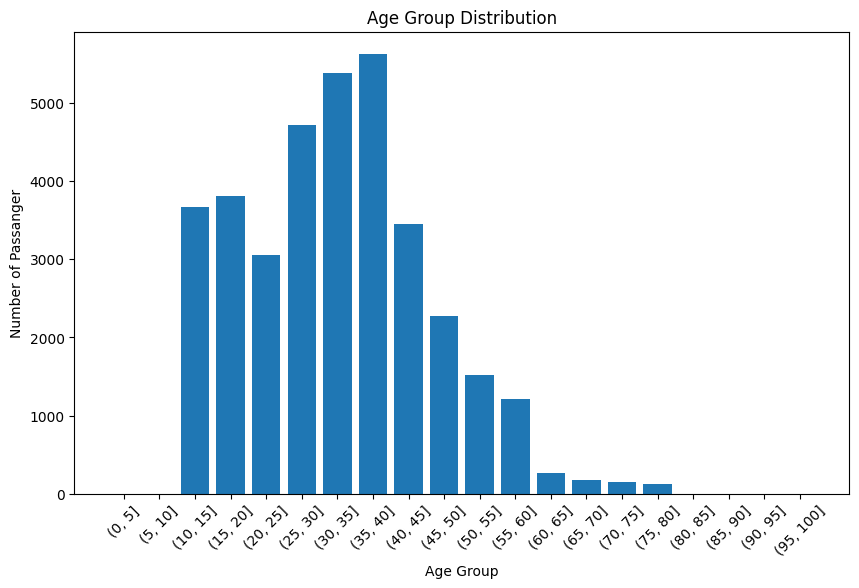

In [1031]:
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts['age'], age_group_counts['count'])
plt.xlabel('Age Group')
plt.ylabel('Number of Passanger')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

> ### Insight:
- The majority of the users fall within the age range of 10 to 35 years.
- Specifically, the highest counts are in the age groups 10-15 (3667), 15-20 (3809), 25-30 (4713), 30-35 (5389), and 35-40 (5631).
- This indicates that a significant portion of your user base is composed of young individuals.

## Distribution of Trip Time Spent

In [1032]:
df['tripTimeSpent'].describe()

count    35428.000000
mean        72.186020
std         28.048041
min         15.000000
25%         51.166667
50%         71.950000
75%         95.783333
max        179.050000
Name: tripTimeSpent, dtype: float64

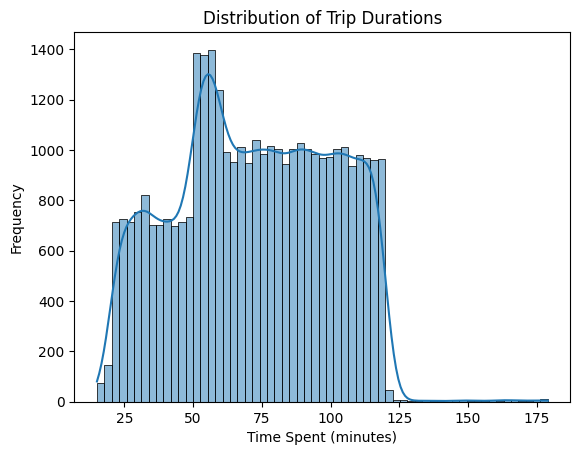

In [1033]:
# Create histogram plot
sns.histplot(df['tripTimeSpent'], kde=True)
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

> ### Insight:

- The center of the distribution indicates the most common trip duration. Since the peak is 50-60 minutes, it means that most trip of passangers takes about an hour.

## Duration for Each Type

In [1034]:
corridor_names = [
    "Tanjung Priok - Tanah Merdeka",
    "Stasiun Manggarai - UI",
    "Semper - Rorotan",
    "Puri Kembangan - Sentraland Cengkareng",
    "Pulo Gebang - Pulo Gadung 2",
    "PGC - Juanda",
    "Lenteng Agung - Aseli",
    "Cililitan - Condet",
    "BSD - Jelambar",
    "Tanah Abang - Blok M",
    "Roxy - Benhil",
    "Pinang Ranti - Pulo Gadung",
    "Kampung Rambutan - Tanjung Priok",
    "Cinere - Kuningan",
    "Summarecon Bekasi - BNN",
    "Rusun Rawa Bebek - Bukit Duri"
]


In [1035]:
df_underperform_weekend = df[
    (df['corridorName'].isin(corridor_names)) & 
    (df['day'].isin(['Saturday', 'Sunday']))]

In [1036]:
df_underperform_weekend[['type','week','day', 'corridorID','tapInTime','tapOutTime','tripTimeSpent']][df_underperform_weekend['corridorID']=='JAK.117']

,type,week,day,corridorID,tapInTime,tapOutTime,tripTimeSpent
32067,mikrotrans,14,Sunday,JAK.117,2023-04-09 21:19:19,2023-04-09 22:13:49,54.500000
32265,mikrotrans,14,Saturday,JAK.117,2023-04-08 19:00:12,2023-04-08 20:32:04,91.866667
32301,mikrotrans,14,Sunday,JAK.117,2023-04-09 16:28:11,2023-04-09 16:47:24,19.216667
32454,mikrotrans,14,Saturday,JAK.117,2023-04-08 08:25:19,2023-04-08 10:21:34,116.250000
32643,mikrotrans,14,Sunday,JAK.117,2023-04-09 06:30:47,2023-04-09 07:57:57,87.166667
32828,mikrotrans,15,Sunday,JAK.117,2023-04-16 14:19:09,2023-04-16 16:01:18,102.150000
33730,mikrotrans,16,Saturday,JAK.117,2023-04-22 09:19:01,2023-04-22 10:01:03,42.033333
34627,mikrotrans,17,Saturday,JAK.117,2023-04-29 06:58:17,2023-04-29 07:26:15,27.966667


In [1037]:
corridor_timespent = df_underperform_weekend.groupby(['type','week','day','corridorID'])['tripTimeSpent'].mean().reset_index()
corridor_timespent

,type,week,day,corridorID,tripTimeSpent
0,mikrotrans,14,Saturday,JAK.08,101.900000
1,mikrotrans,14,Saturday,JAK.117,104.058333
2,mikrotrans,14,Saturday,JAK.16,49.750000
3,mikrotrans,14,Sunday,JAK.05,35.250000
4,mikrotrans,14,Sunday,JAK.117,53.627778
...,...,...,...,...,...
79,transjakarta,17,Sunday,3E,64.016667
80,transjakarta,17,Sunday,4B,64.766667
81,transjakarta,17,Sunday,5C,57.316667
82,transjakarta,17,Sunday,B11,26.433333


In [1038]:
day_timespent = corridor_timespent.groupby(['type','week','day'])['tripTimeSpent'].mean().reset_index()
day_timespent

,type,week,day,tripTimeSpent
0,mikrotrans,14,Saturday,85.236111
1,mikrotrans,14,Sunday,53.594444
2,mikrotrans,15,Saturday,67.469444
3,mikrotrans,15,Sunday,85.405556
4,mikrotrans,16,Saturday,68.619444
5,mikrotrans,16,Sunday,67.656250
6,mikrotrans,17,Saturday,50.825000
7,mikrotrans,17,Sunday,55.030556
8,royaltrans,14,Saturday,94.966667
9,royaltrans,14,Sunday,99.900000


In [1039]:
type_timespent = day_timespent.groupby(['type'])['tripTimeSpent'].mean().reset_index()
type_timespent

,type,tripTimeSpent
0,mikrotrans,66.729601
1,royaltrans,76.308889
2,transjakarta,64.158954


> ### Insight
- Transjakarta appears to have the fastest average trip time (64.16 minutes) compared to Mikrotrans (66.73 minutes) and Royaltrans (76.31 minutes).

## Peak Times

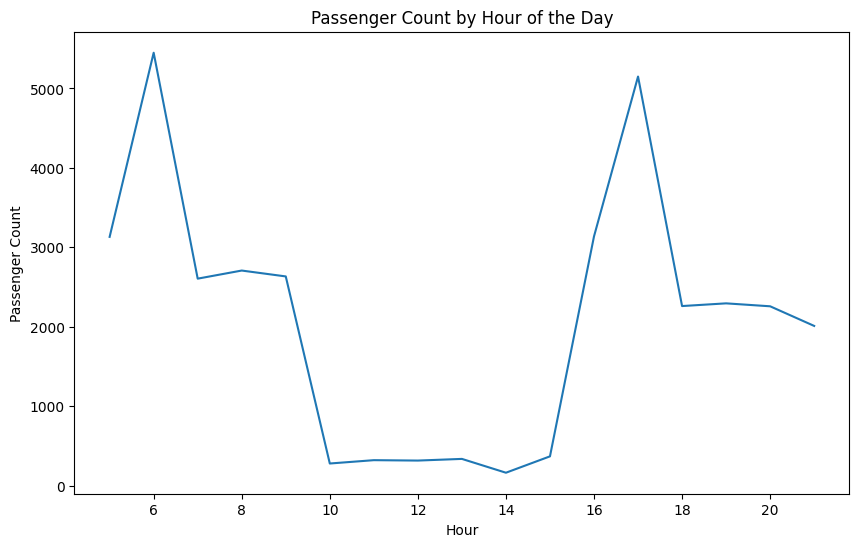

In [1040]:
# Plot passenger count by hour
plt.figure(figsize=(10, 6))
df['hour'].value_counts().sort_index().plot(kind='line')
plt.title('Passenger Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Passenger Count')
plt.show()

> ### Insight
- **Daily Ridership Pattern** : The chart reveals the ridership pattern across a typical day on the Transjakarta network. It appears there are two peaks, one in the morning and another in the evening, which likely correspond to rush hour commutes.
- **Morning Rush Hour**: The ridership increases significantly in the morning, reaching a peak at around 6 AM. This suggests a substantial number of passengers using Transjakarta to travel during morning commute hours
- **Evening Rush Hour**: The ridership increases again in the evening, reaching a peak at around 5 PM (based on the image, the exact hour is difficult to determine). This indicates another surge in passenger volume likely due to homeward commutes.

## Number of Passangers each day

In [1041]:
number_of_passangers = df.groupby(['week','day'])['transID'].count().reset_index().rename(columns={'transID':'numberPassangers'})
number_of_passangers

,week,day,numberPassangers
0,13,Saturday,14
1,13,Sunday,7
2,14,Friday,1514
3,14,Monday,1495
4,14,Saturday,321
5,14,Sunday,350
6,14,Thursday,1491
7,14,Tuesday,1524
8,14,Wednesday,1494
9,15,Friday,1897


In [1042]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_day_passangers = number_of_passangers.groupby('day')['numberPassangers'].mean()
avg_day_passangers = avg_day_passangers[days_order]
avg_day_passangers

day
Monday       1598.00
Tuesday      1600.75
Wednesday    1595.75
Thursday     1597.50
Friday       1610.25
Saturday      340.00
Sunday        343.80
Name: numberPassangers, dtype: float64

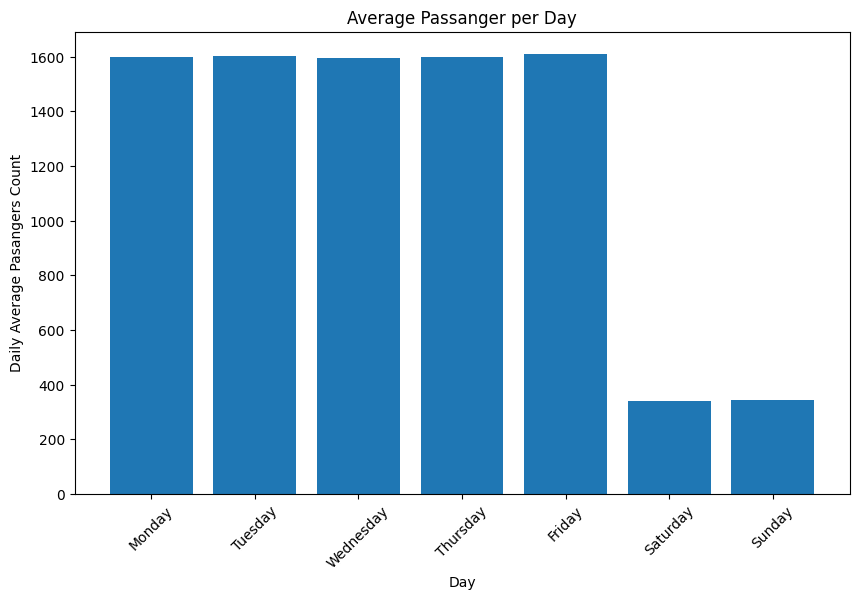

In [1043]:
# Create a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(avg_day_passangers.index, avg_day_passangers.values)
plt.xlabel('Day')
plt.ylabel('Daily Average Pasangers Count')
plt.title('Average Passanger per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Hourly Average Passangers 

In [1044]:
day_hour = df.groupby(['week','day','hour']).size().reset_index().rename(columns={0:'numberPassangers'})
day_hour

,week,day,hour,numberPassangers
0,13,Saturday,6,2
1,13,Saturday,7,1
2,13,Saturday,9,1
3,13,Saturday,10,1
4,13,Saturday,12,1
...,...,...,...,...
430,17,Wednesday,17,228
431,17,Wednesday,18,95
432,17,Wednesday,19,108
433,17,Wednesday,20,90


In [1045]:
day_hour_group = day_hour.groupby(['day','hour'])['numberPassangers'].mean().reset_index()

day_hour_group

,day,hour,numberPassangers
0,Friday,5,150.00
1,Friday,6,262.50
2,Friday,7,116.25
3,Friday,8,128.25
4,Friday,9,124.50
...,...,...,...
114,Wednesday,17,246.75
115,Wednesday,18,104.50
116,Wednesday,19,106.75
117,Wednesday,20,94.75


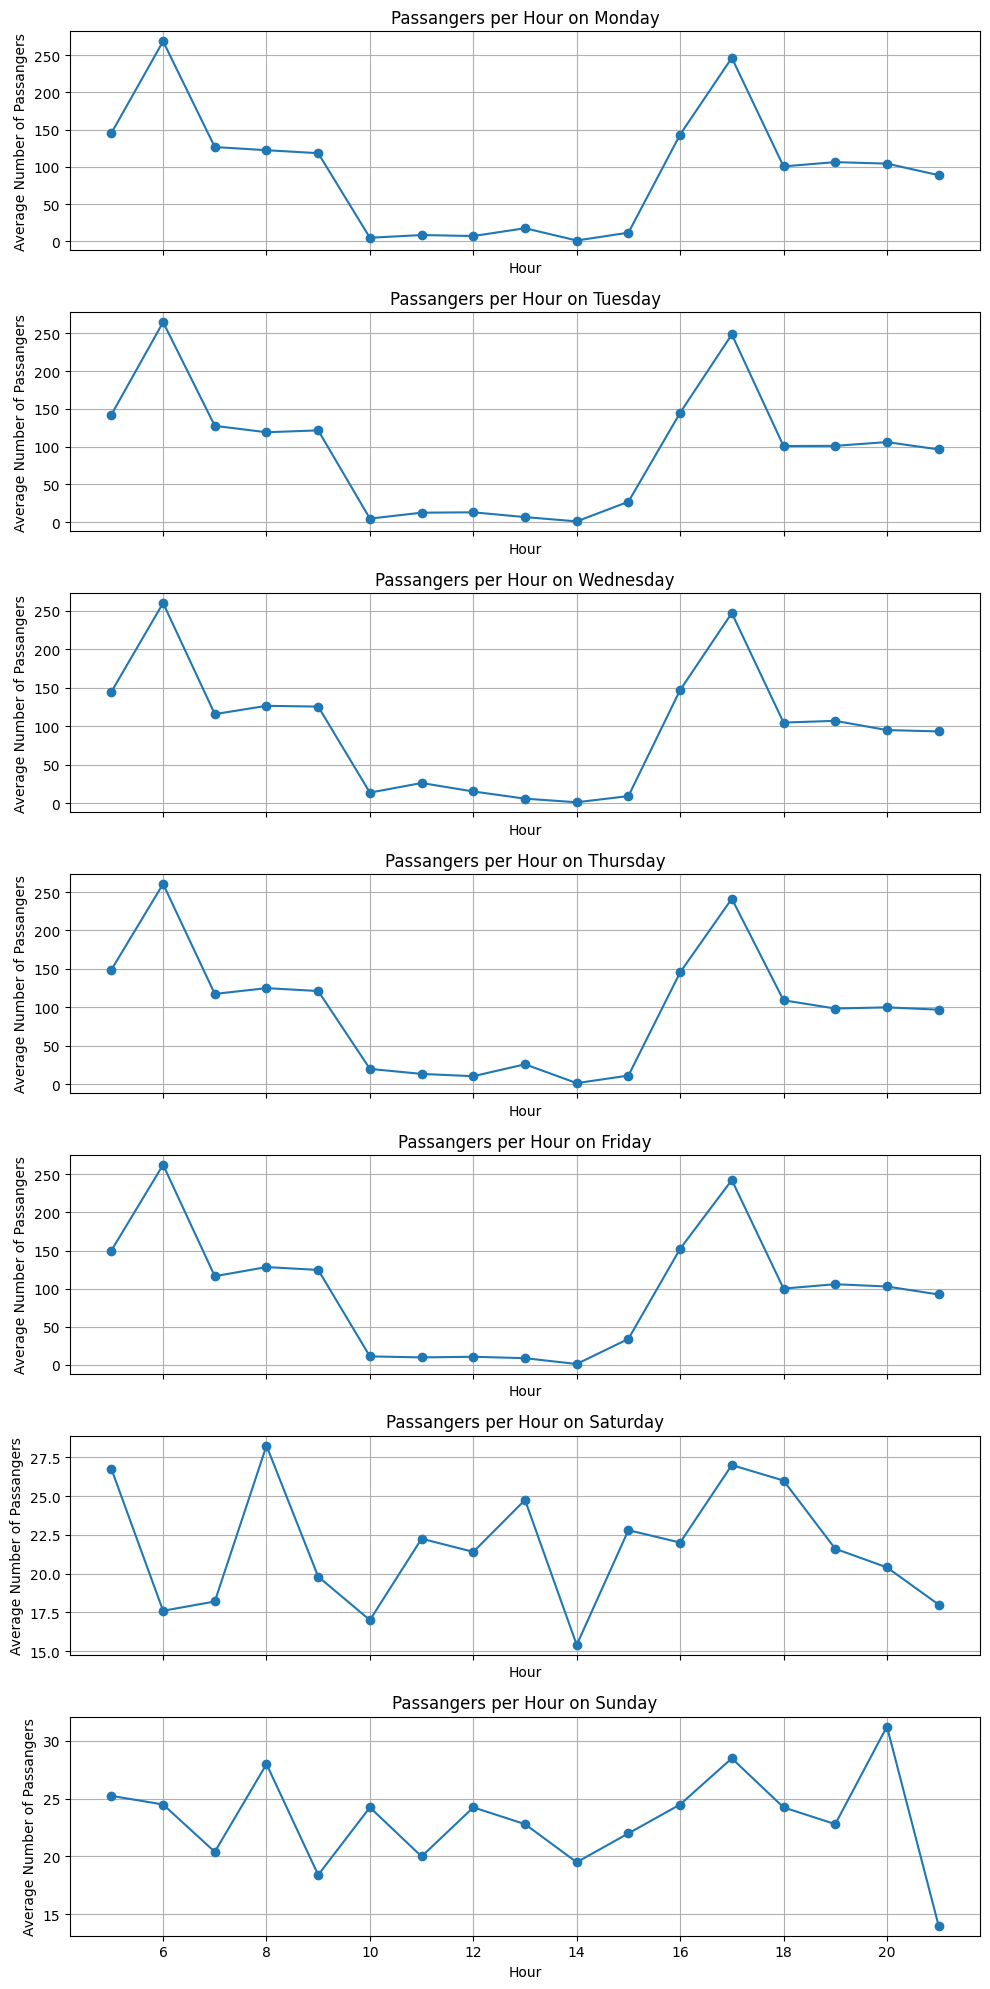

In [1046]:
#List of days to plot
days = days_order

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(days), 1, figsize=(10, 20), sharex=True)

# Plotting each day
for i, day in enumerate(days):
    day_data = day_hour_group[day_hour_group['day'] == day]
    axes[i].plot(day_data['hour'], day_data['numberPassangers'], marker='o')
    axes[i].set_title(f'Passangers per Hour on {day}')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average Number of Passangers')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

> ### Insight
- **Weekday vs. Weekend Ridership Patterns**: The chart reveals distinct ridership patterns between weekdays and weekends. On weekdays, there are two clear peaks, one in the morning and another in the evening, which likely correspond to rush hour commutes. Ridership appears to be lower on weekends.
- **Rush Hour Ridership**: Weekday mornings and evenings see significantly higher passenger volumes compared to other times. The morning peak (around 6 AM) suggests a substantial number of passengers using Transjakarta to travel during morning commutes. Similarly, the evening peak (around 5 PM) indicates another surge in passenger volume likely due to homeward commutes.


## Top 10 Corridor Name

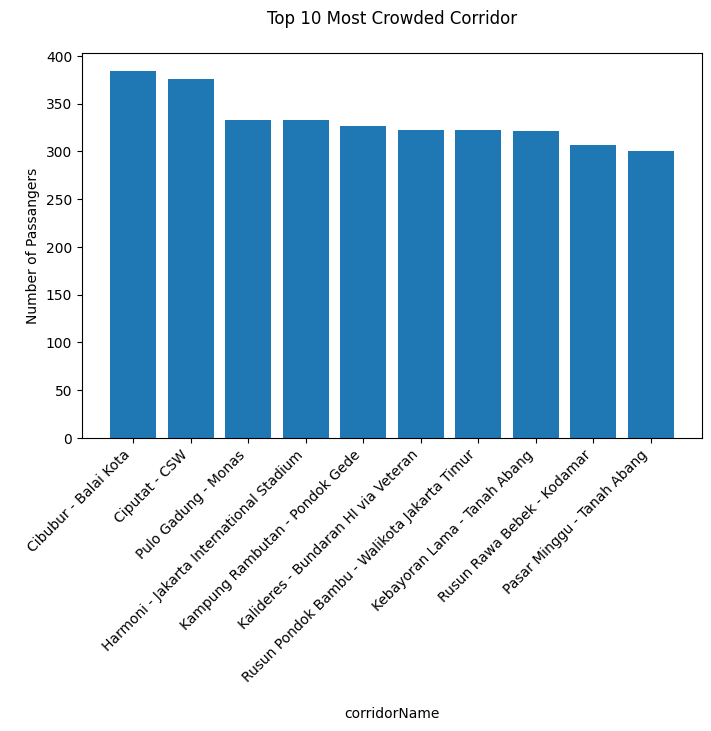

In [1047]:
# Get the top 10 corridor names
top_10_corridors = df['corridorName'].value_counts().head(10).reset_index()

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top_10_corridors['corridorName'], top_10_corridors['count'])

# Add labels and title
plt.ylabel('\nNumber of Passangers', size=10)
plt.xlabel('\ncorridorName', size=10)
plt.title('Top 10 Most Crowded Corridor\n', size=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right') 

plt.show()

> ### Insight:

- Cibubur - Balai Kota Corridor seems to have the most passengers based on the graph.
- It reveals that some corridors experience significantly higher passenger volumes compared to others.

## Top 10 Corridor ID by Daily Average Passangers

In [1048]:
# Group by corridorID and calculate average travel time
corridorID_group = df.groupby(['day','type','corridorID'])['tripTimeSpent'].agg(['mean', 'median', 'count']).reset_index()
top10_avg_passangers_corridor = corridorID_group.groupby(['type','corridorID'])['count'].median().reset_index().sort_values(by='count',ascending=False).head(10)


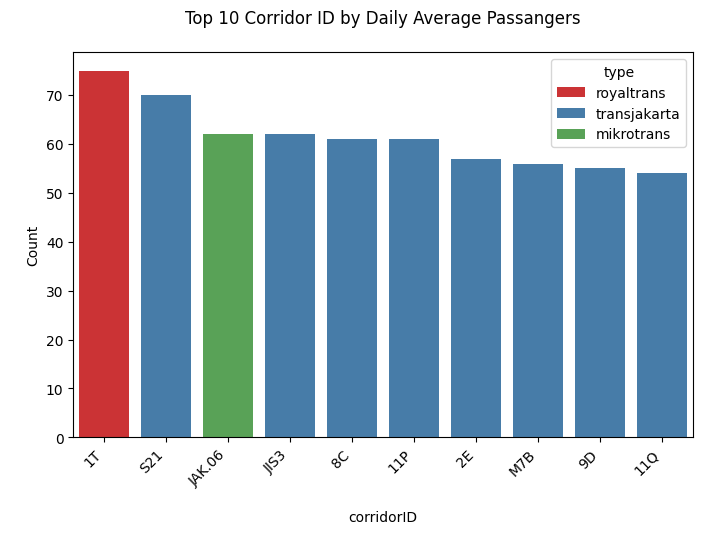

In [1049]:
# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
sns.barplot(x='corridorID', y='count', hue='type', data=top10_avg_passangers_corridor,palette='Set1')


# Set labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\ncorridorID', size=10)
plt.title('Top 10 Corridor ID by Daily Average Passangers\n', size=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')


plt.show()

> ### Insight 
- The graph indicates the top 10 corridors with the highest average daily ridership
- The corridor with the ID "1T" from royaltrans seems to have the highest average daily ridership, followed by "S21" from transjakarta and "JAK.06" from mikrotrans.

## Top 10 Corridor ID by Daily Average Duration

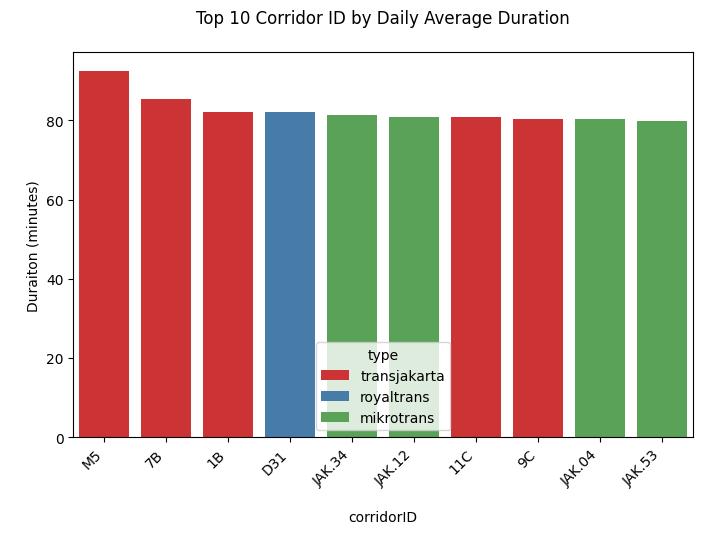

In [1050]:
top10_avg_duration_corridor = corridorID_group.groupby(['type','corridorID'])['mean'].mean().reset_index().sort_values(by='mean',ascending=False).head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
sns.barplot(x='corridorID', y='mean', hue='type', data=top10_avg_duration_corridor,palette='Set1')

# Set labels and title
plt.ylabel('\nDuraiton (minutes)', size=10)
plt.xlabel('\ncorridorID', size=10)
plt.title('Top 10 Corridor ID by Daily Average Duration\n', size=12)

# Rotate x labels for readability 
plt.xticks(rotation=45, ha='right')  


plt.show()


> ### Insight 
- The chart allows you to compare the average trip durations across different corridors. 
- The corridor with the ID "M5" from transjakarta seems to have the highest average daily duration, followed by "7B" from transjakarta and "1B" from transjakarta.

## Top 10 Popular Halte based on Tap In

In [1051]:
# Groupby Tap In Stop Name and Sort by number of Tap In
popular_tapin = df.groupby('tapInStopsName').size().sort_values(ascending=False)
popular_tapin = popular_tapin.reset_index().rename(columns={0:'count'})
popular_tapin

,tapInStopsName,count
0,Penjaringan,229
1,Garuda Taman Mini,198
2,BKN,159
3,BNN LRT,145
4,Pejaten,144
...,...,...
2486,SDN Pondok Kelapa 05,1
2487,SDN Ragunan 14,1
2488,SDN Rawamangun 05,1
2489,SDN Srengseng Sawah 01,1


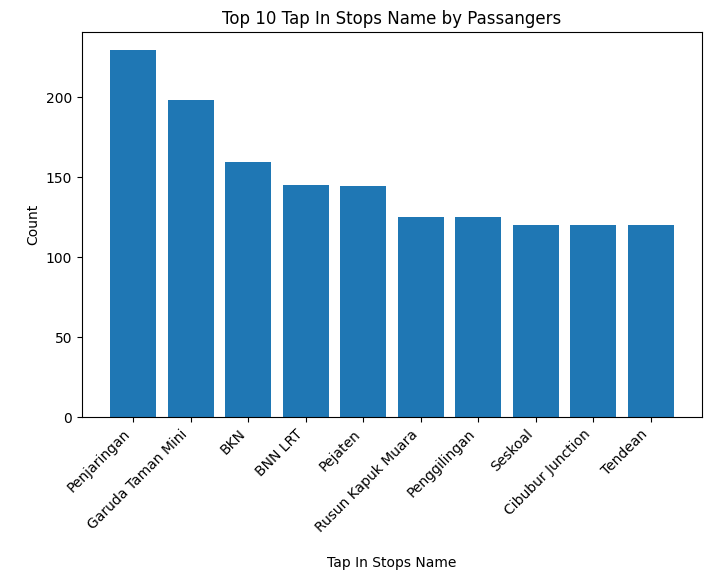

In [1052]:
# Filter only top 10
top10_popular_tapin = popular_tapin.head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_popular_tapin['tapInStopsName'], top10_popular_tapin['count'])

# Set labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\nTap In Stops Name', size=10)
plt.title('Top 10 Tap In Stops Name by Passangers', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  


plt.show()


> ### Insight
- The chart highlights a disparity in ridership across different entry points.
- The stop named "Penjaringan" seems to have the most passengers tapping in, followed by "Garuda Taman Mini" and "BKN".


## Top 10 Popular Halte based on Tap Out

In [1053]:
popular_tapout = df.groupby('tapOutStopsName').size().sort_values(ascending=False)
popular_tapout = popular_tapout.reset_index().rename(columns={0:'count'})
popular_tapout

,tapOutStopsName,count
0,BKN,302
1,Penjaringan,264
2,Term. Senen,188
3,Monas,158
4,Term. Kampung Rambutan,158
...,...,...
2182,Jln. Telepon Kota,1
2183,Jln. Budi Mulia Utara,1
2184,Sbr. Puskesmas Kel. Dukuh,1
2185,Sbr. Puskesmas Kel. Semper Barat II,1


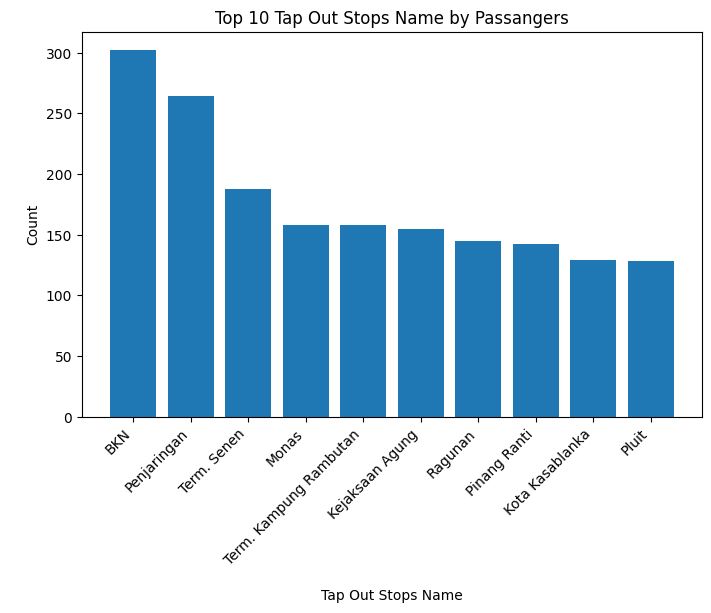

In [1054]:
top10_popular_tapout = popular_tapout.head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_popular_tapout['tapOutStopsName'], top10_popular_tapout['count'])

# Set labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\nTap Out Stops Name', size=10)
plt.title('Top 10 Tap Out Stops Name by Passangers', size=12)

# Rotate x labels for readability 
plt.xticks(rotation=45, ha='right') 

plt.show()


> ### Insight
- The chart highlights a disparity in ridership across different exit points.
- The stop named "BKN" seems to have the most passengers tapping in, followed by "Penjaringan" and "Terminal Senen".
